## CICIDS 2018

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
np.random.seed(178)

In [ ]:
df = pd.read_csv('clean_data.csv')
df

Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0               0      112641719             3             0                0   
1               0      112641466             3             0                0   
2               0      112638623             3             0                0   
3               6        6453966            15            10             1239   
4               6        8804066            14            11             1143   
...           ...            ...           ...           ...              ...   
2798299         6       19276110             5            10              286   
2798300         6       85992425             2             0                0   
2798301        17          79134             1             1               41   
2798302         6       10053785            11            12             1321   
2798303         6         566835             6             5              455   

         TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                      0                0                0          0.000000   
1                      0                0                0          0.000000   
2                      0                0                0          0.000000   
3                   2273              744                0         82.600000   
4                   2209              744                0         81.642857   
...                  ...              ...              ...               ...   
2798299              738              103                0         57.200000   
2798300                0                0                0          0.000000   
2798301               98               41               41         41.000000   
2798302             1659              677                0        120.090909   
2798303              338              140                0         75.833333   

         Fwd Pkt Len Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0               0.000000  ...                 0          0.0         0.0   
1               0.000000  ...                 0          0.0         0.0   
2               0.000000  ...                 0          0.0         0.0   
3             196.741237  ...                32          0.0         0.0   
4             203.745545  ...                32          0.0         0.0   
...                  ...  ...               ...          ...         ...   
2798299        52.485236  ...                20    9667037.0         0.0   
2798300         0.000000  ...                20          0.0         0.0   
2798301         0.000000  ...                 8          0.0         0.0   
2798302       197.116440  ...                20          0.0         0.0   
2798303        62.936211  ...                20          0.0         0.0   

         Active Max  Active Min   Idle Mean    Idle Std  Idle Max  Idle Min  \
0                 0           0  56320859.5  139.300036  56320958  56320761   
1                 0           0  56320733.0  114.551299  56320814  56320652   
2                 0           0  56319311.5  301.934596  56319525  56319098   
3                 0           0         0.0    0.000000         0         0   
4                 0           0         0.0    0.000000         0         0   
...             ...         ...         ...         ...       ...       ...   
2798299     9667037     9667037   9609073.0    0.000000   9609073   9609073   
2798300           0           0  85992425.0    0.000000  85992425  85992425   
2798301           0           0         0.0    0.000000         0         0   
2798302           0           0         0.0    0.000000         0         0   
2798303           0           0         0.0    0.000000         0         0   

          Label  
0        Benign  
1        Benign  
2        Benign  
3        Benign  
4        Benign  
...         ...  
2798299  Benign  
2798300  Benign  
2798301  Benign  
2798302  Benign  
2798303  Benign

In [ ]:
df.shape

(2798304, 70)

In [ ]:
df.isnull().sum()

Protocol           0
Flow Duration      0
Tot Fwd Pkts       0
Tot Bwd Pkts       0
TotLen Fwd Pkts    0
                  ..
Idle Mean          0
Idle Std           0
Idle Max           0
Idle Min           0
Label              0
Length: 70, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798304 entries, 0 to 2798303
Data columns (total 70 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Protocol           int64  
 1   Flow Duration      int64  
 2   Tot Fwd Pkts       int64  
 3   Tot Bwd Pkts       int64  
 4   TotLen Fwd Pkts    int64  
 5   TotLen Bwd Pkts    int64  
 6   Fwd Pkt Len Max    int64  
 7   Fwd Pkt Len Min    int64  
 8   Fwd Pkt Len Mean   float64
 9   Fwd Pkt Len Std    float64
 10  Bwd Pkt Len Max    int64  
 11  Bwd Pkt Len Min    int64  
 12  Bwd Pkt Len Mean   float64
 13  Bwd Pkt Len Std    float64
 14  Flow Byts/s        float64
 15  Flow Pkts/s        float64
 16  Flow IAT Mean      float64
 17  Flow IAT Std       float64
 18  Flow IAT Max       int64  
 19  Flow IAT Min       int64  
 20  Fwd IAT Tot        int64  
 21  Fwd IAT Mean       float64
 22  Fwd IAT Std        float64
 23  Fwd IAT Max        int64  
 24  Fwd IAT Min        int64  
 25  Bwd IAT Tot       

## Train-Test Split

In [ ]:
X = df.drop('Label', axis = 1)
Y = df[['Label']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [ ]:
Y_train.value_counts()

Label           
Benign              2071614
Infilteration         91055
SSH-Bruteforce        75238
Brute Force -Web        444
Brute Force -XSS        182
SQL Injection            67
FTP-BruteForce           43
Name: count, dtype: int64

In [ ]:
Y_test.value_counts()

Label           
Benign              517903
Infilteration        22764
SSH-Bruteforce       18810
Brute Force -Web       111
Brute Force -XSS        46
SQL Injection           17
FTP-BruteForce          10
Name: count, dtype: int64

In [ ]:
X_train.shape

(2238643, 69)

In [ ]:
X_test.shape

(559661, 69)

In [ ]:
Y_train.shape

(2238643, 1)

In [ ]:
Y_test.shape

(559661, 1)

## Correlation

In [ ]:
columns = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [ ]:
data_Xtrain = X_train[columns]
combined_data = pd.concat([data_Xtrain, Y_train], axis=1) #Creating a dataframe combining X_train and Y_train

In [ ]:
unique_labels = Y_train['Label'].unique() # Get unique labels

In [ ]:
correlations_by_label = {}
for label in unique_labels:
    label_data = combined_data[combined_data['Label'] == label]
    correlations = label_data[data_Xtrain.columns].corr()
    correlations_by_label[label] = correlations

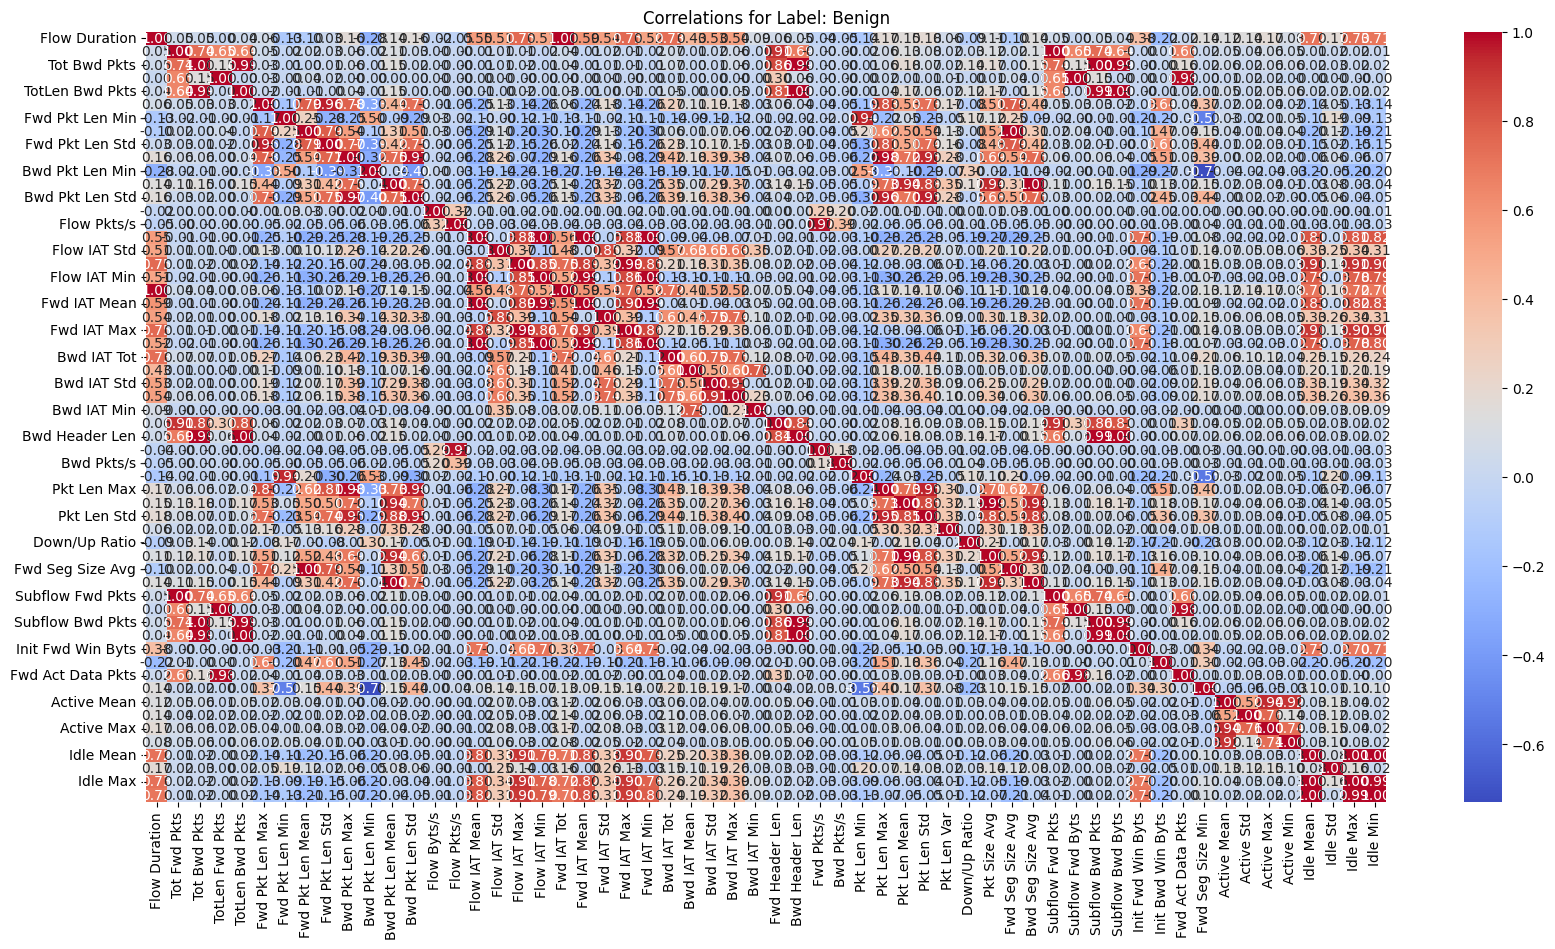

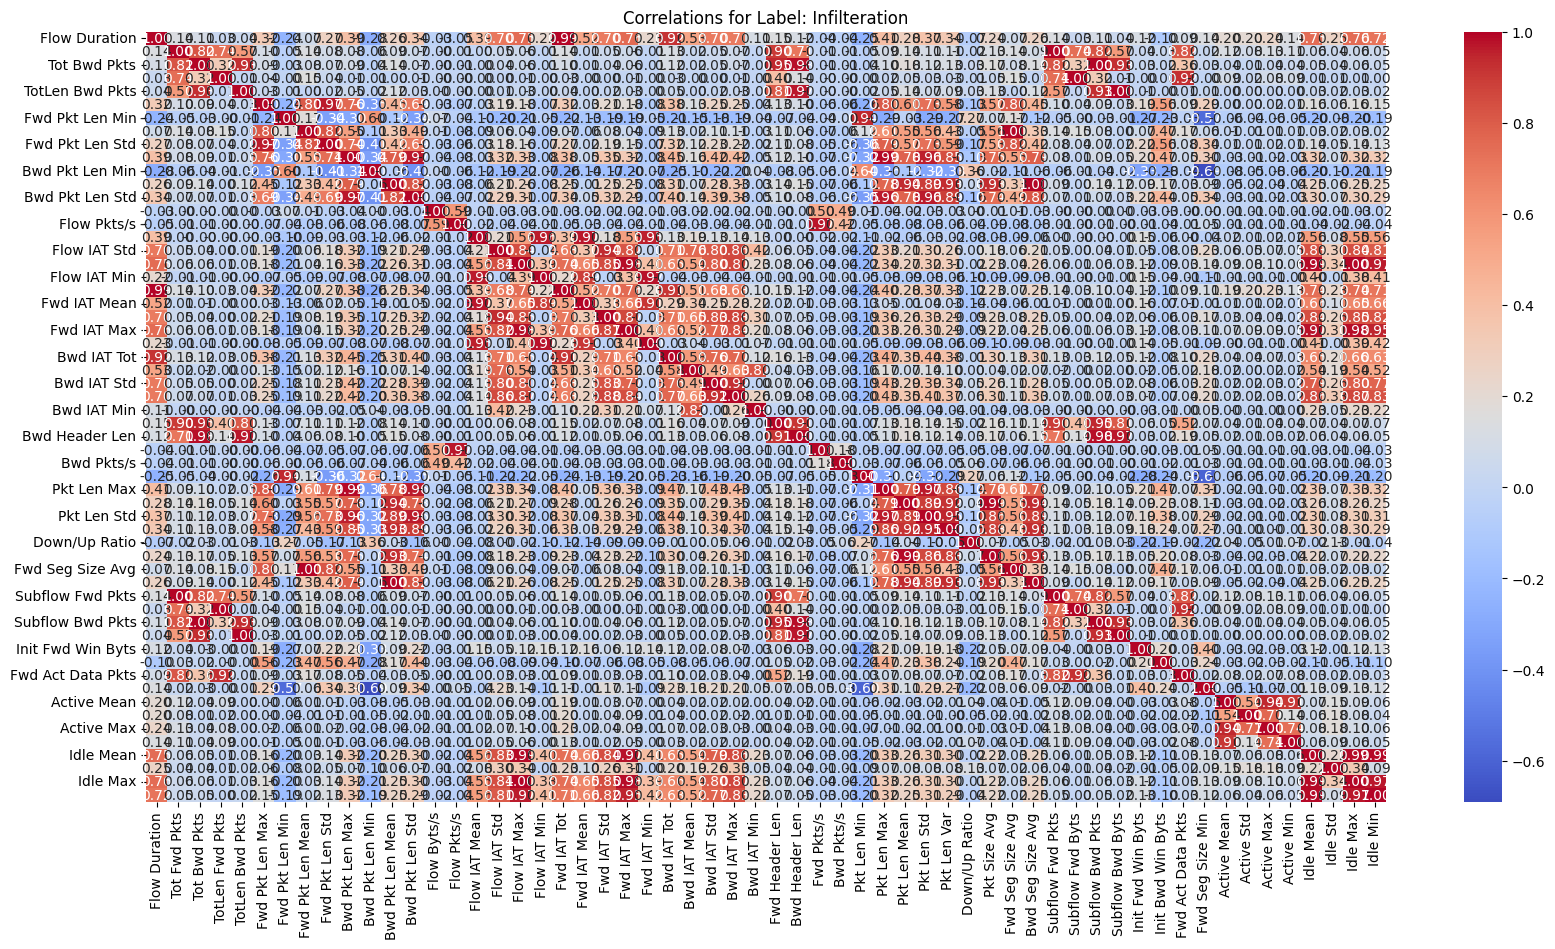

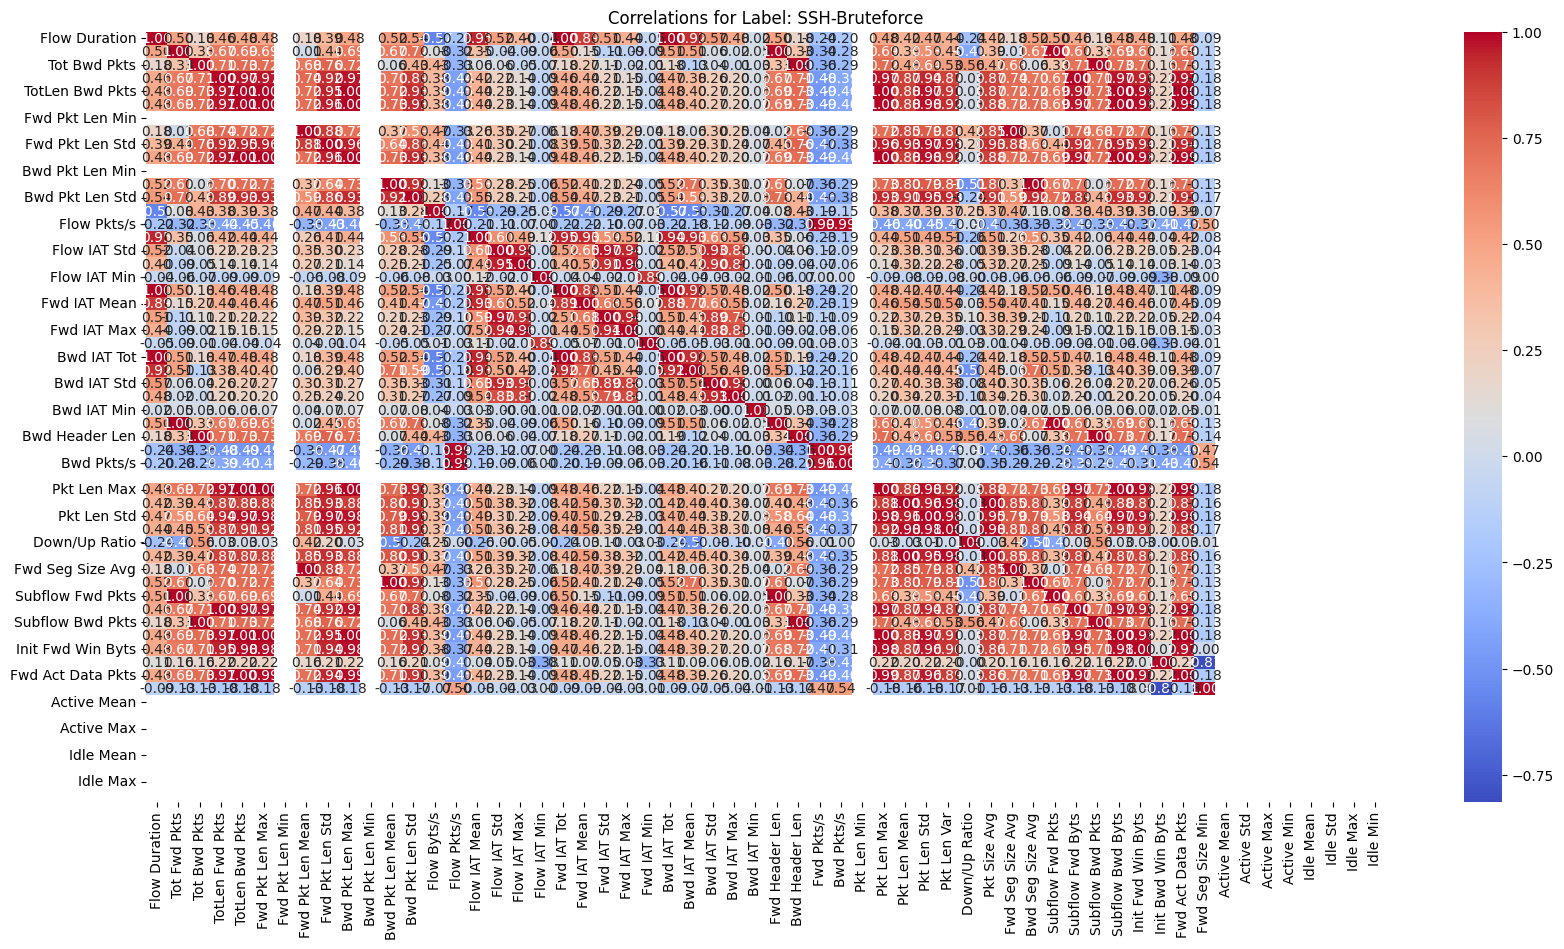

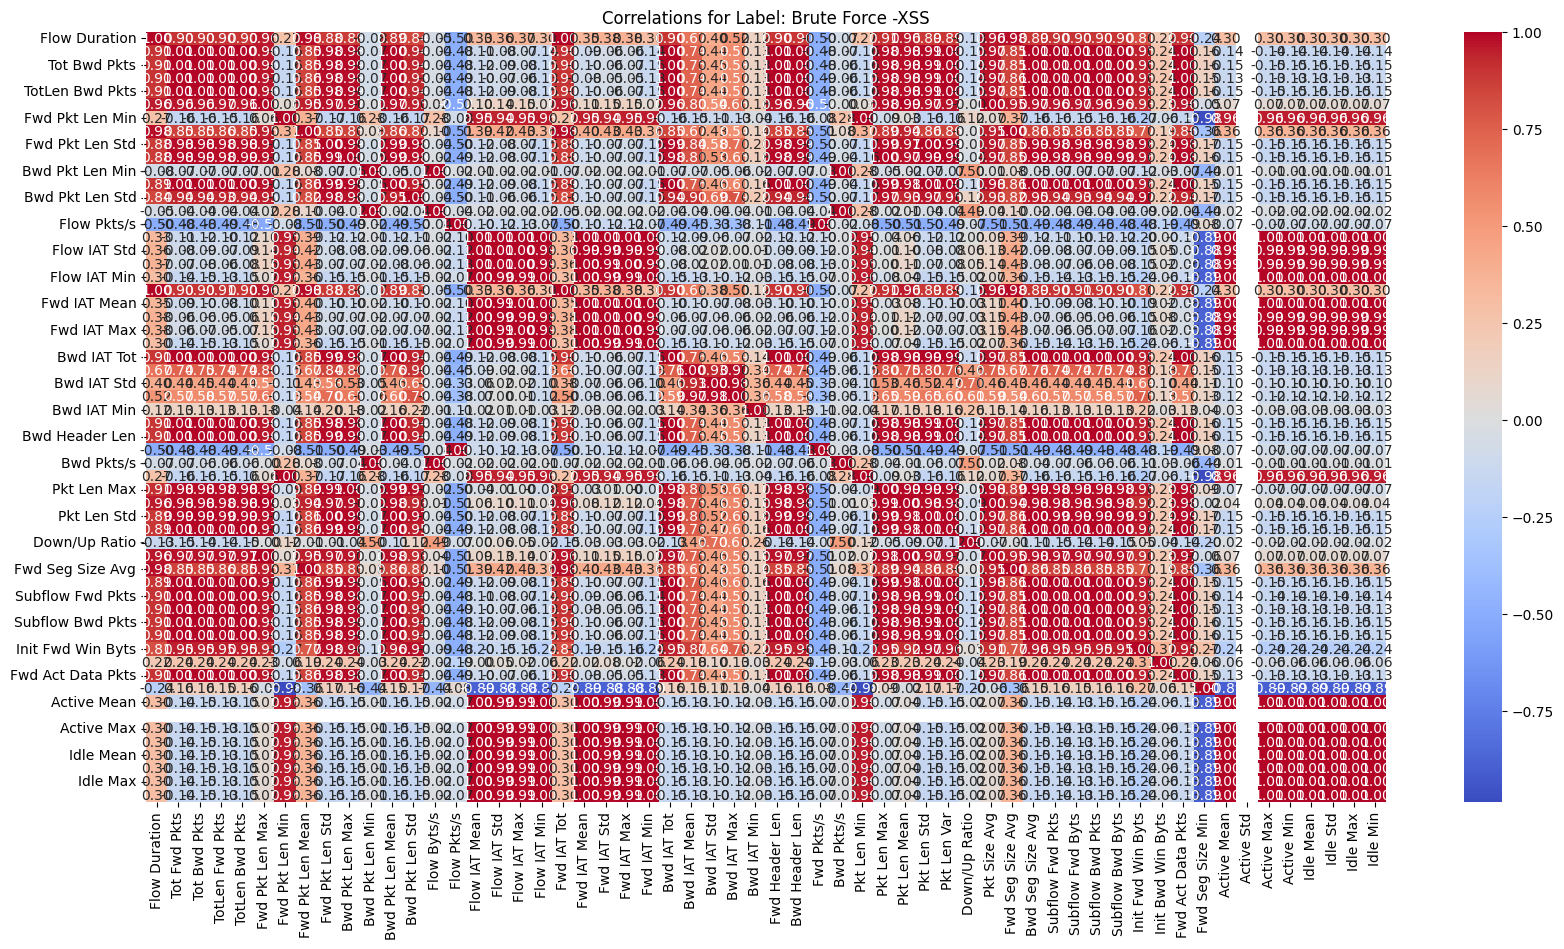

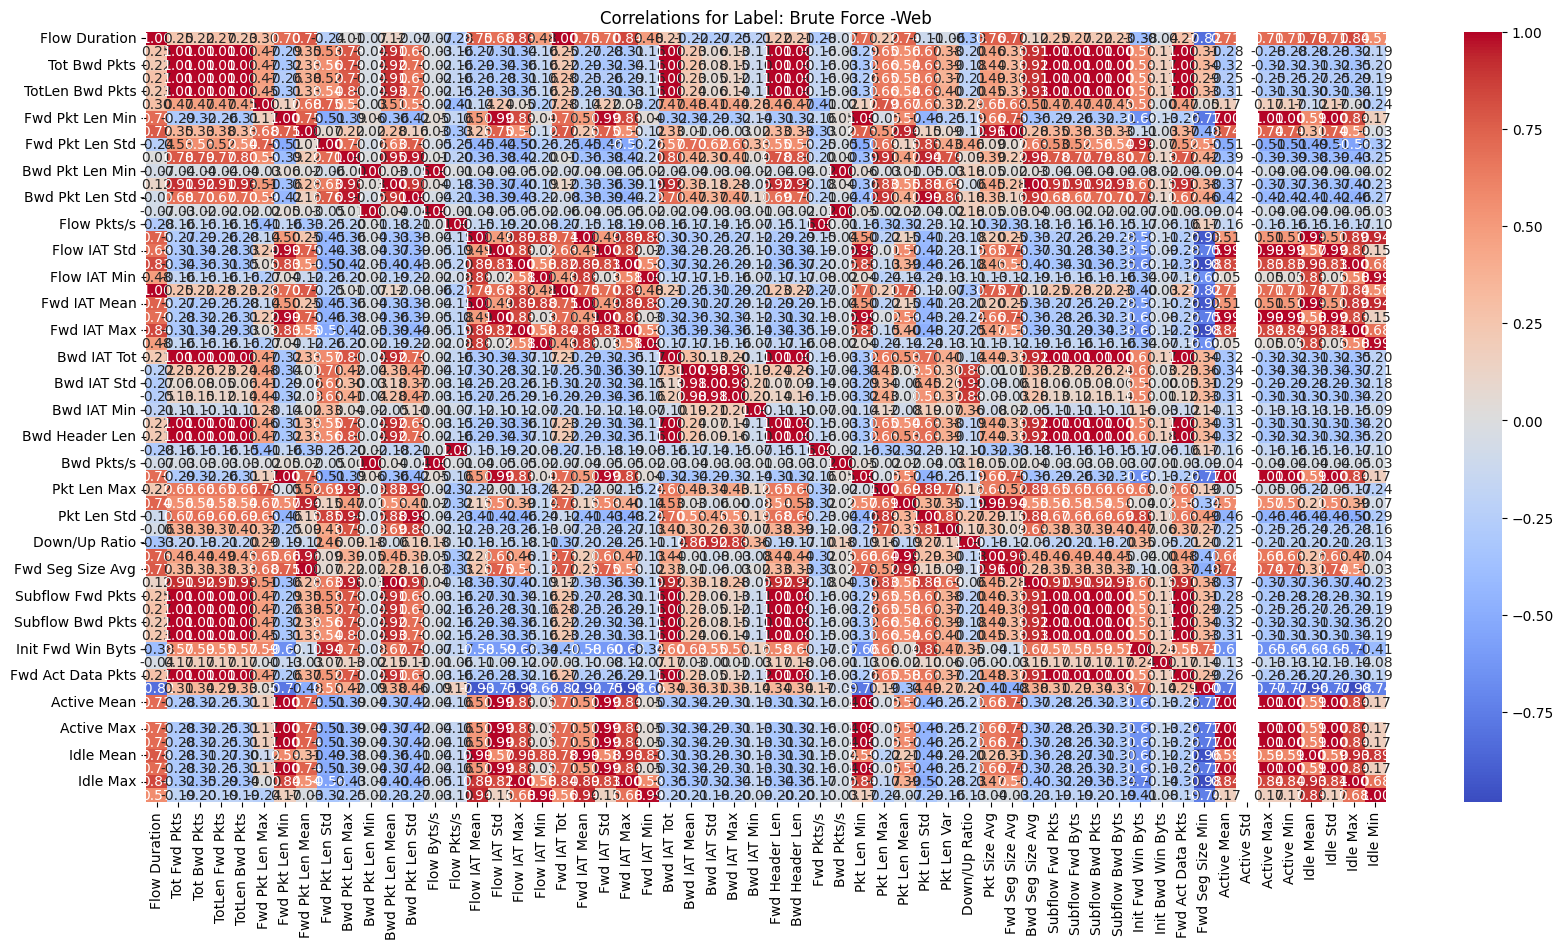

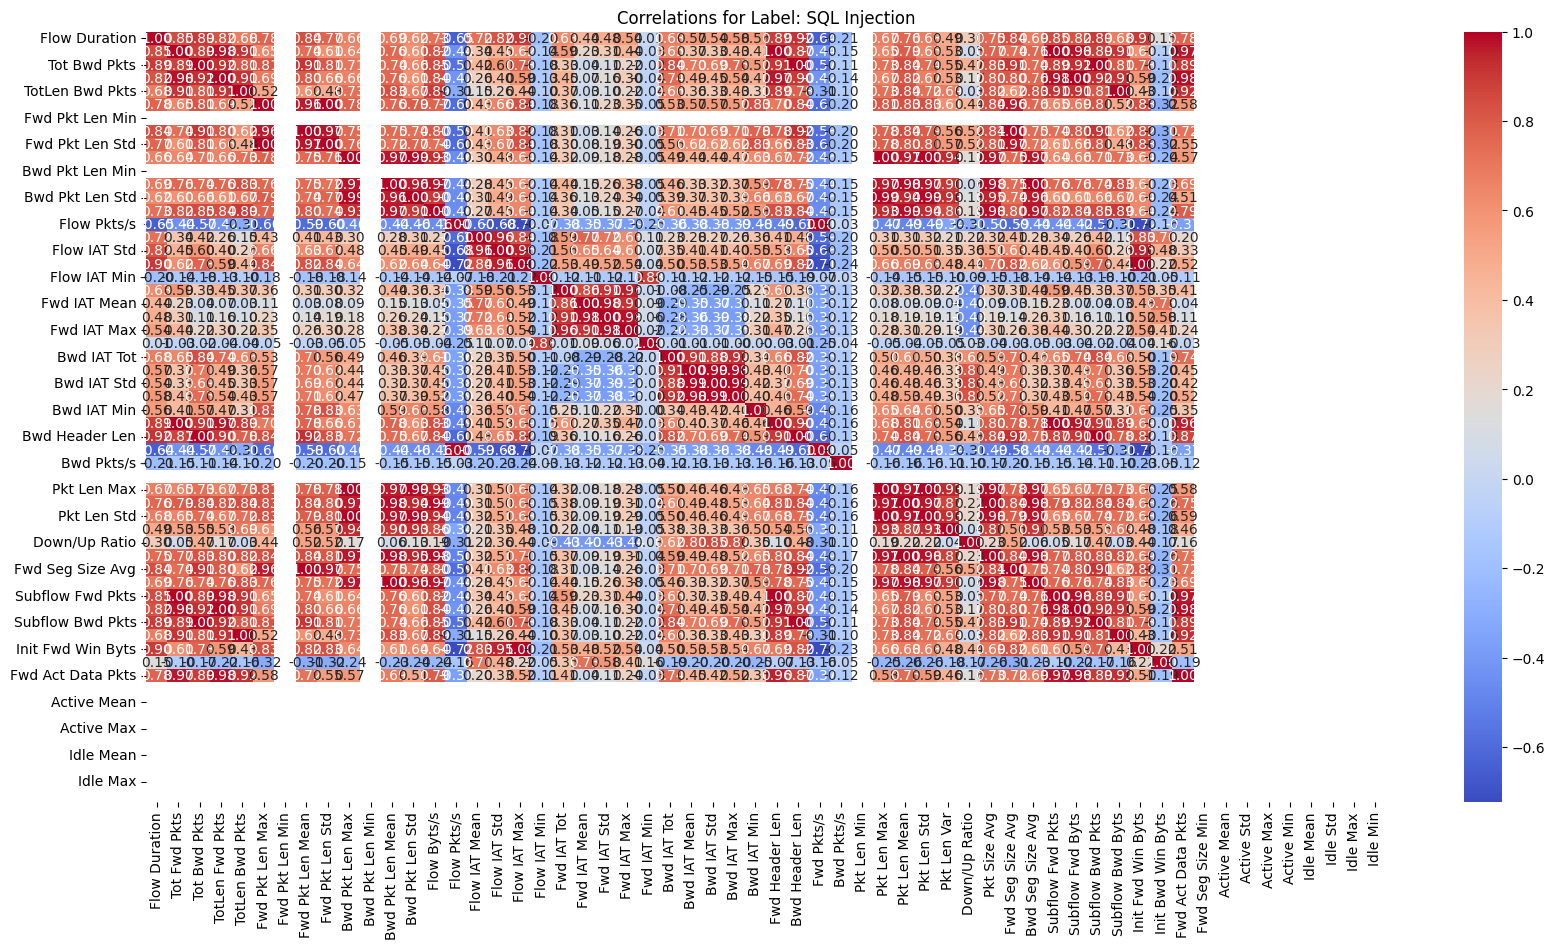

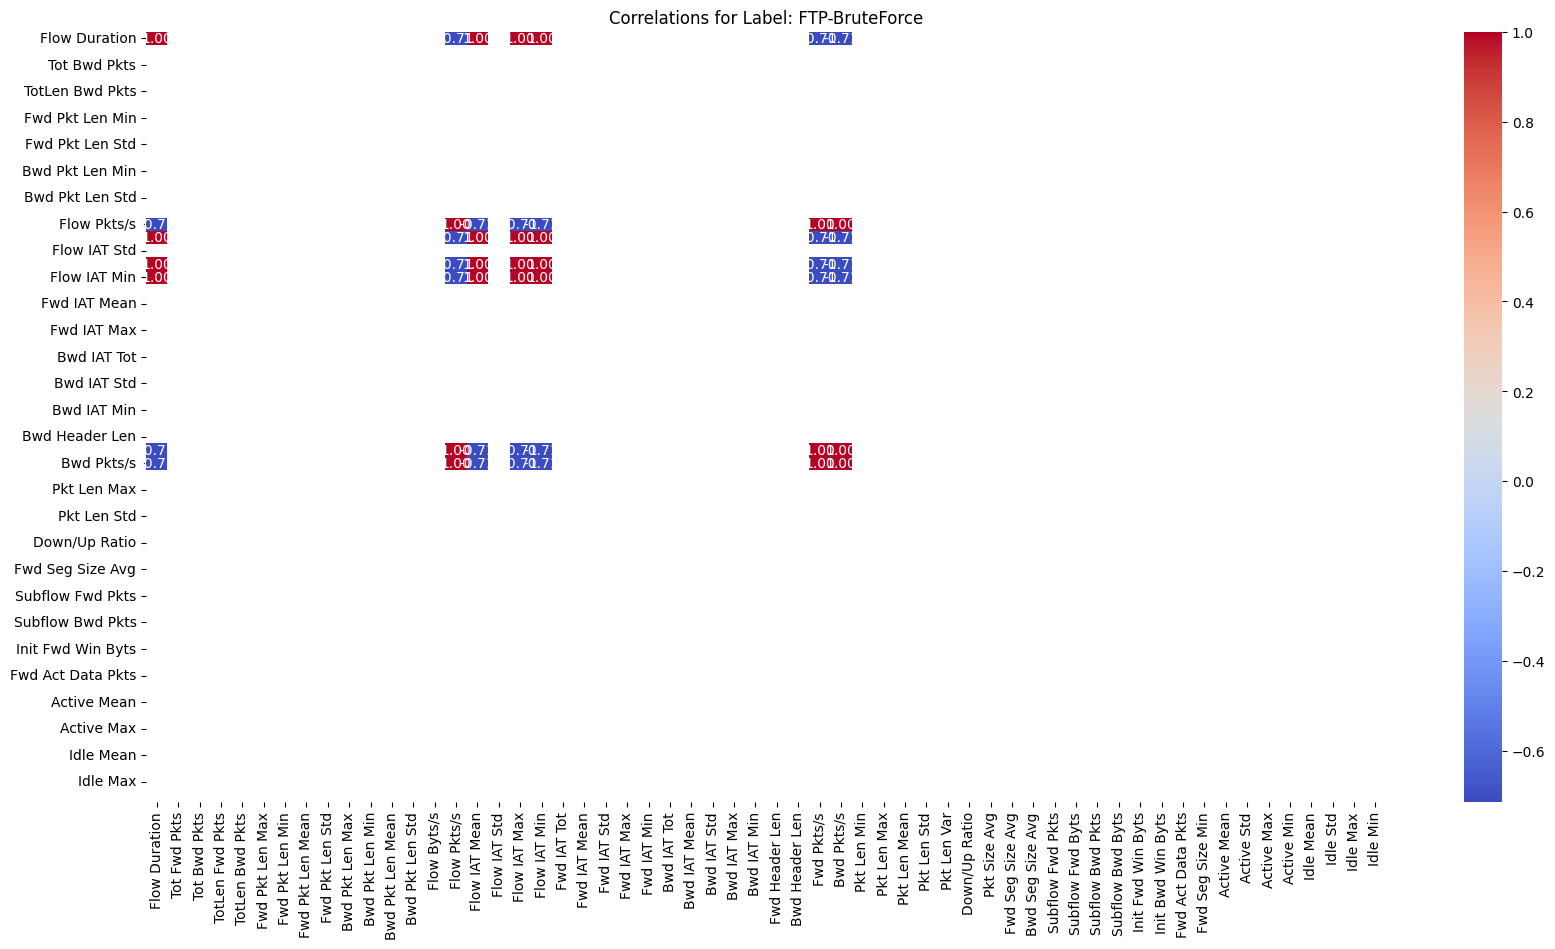

In [ ]:
for label, correlations in correlations_by_label.items(): # Visualize the correlations for each label
    plt.figure(figsize=(20, 10))
    plt.title(f"Correlations for Label: {label}")
    sb.heatmap(correlations, cmap='coolwarm', annot=True, fmt=".2f")
    plt.show()

## Normalization

In [ ]:
X_train.head()

Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
122153          6        2437260             7             7             1148   
262331          6        3163550            10             7             1148   
2400447         6            892             3             4              161   
1534222         6        4232257            14             8             1436   
185065         17            915             1             1               34   

         TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
122153              1581              677                0        164.000000   
262331              1581              677                0        114.800000   
2400447              488              161                0         53.666667   
1534222             1731              725                0        102.571429   
185065                50               34               34         34.000000   

         Fwd Pkt Len Std  ...  Fwd Act Data Pkts  Fwd Seg Size Min  \
122153        238.316316  ...                  5                20   
262331        210.092466  ...                  5                20   
2400447        92.953393  ...                  1                20   
1534222       191.091889  ...                  7                20   
185065          0.000000  ...                  0                 8   

         Active Mean  Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
122153           0.0         0.0           0           0        0.0       0.0   
262331           0.0         0.0           0           0        0.0       0.0   
2400447          0.0         0.0           0           0        0.0       0.0   
1534222          0.0         0.0           0           0        0.0       0.0   
185065           0.0         0.0           0           0        0.0       0.0   

         Idle Max  Idle Min  
122153          0         0  
262331          0         0  
2400447         0         0  
1534222         0         0  
185065          0         0  

[5 rows x 69 columns]

In [ ]:
X_train.shape

(2238643, 69)

In [ ]:
# Min Max Scaling

columns = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [ ]:
data_Xtrain = X_train[columns]

X_Xtrain = data_Xtrain
X_copy_Xtrain = X_Xtrain.copy() #We create a copy so we can still refer to the original dataframe later

In [ ]:
scaler = MinMaxScaler()
X_columns_Xtrain = X_Xtrain.columns
X_scaled_Xtrain = pd.DataFrame(scaler.fit_transform(X_copy_Xtrain), columns=X_columns_Xtrain)
obj = scaler.fit(X_copy_Xtrain)

In [ ]:
additional_columns = X_train.drop(columns=columns)
additional_columns.index = X_scaled_Xtrain.index
X_scaled_Xtrain = pd.concat([X_scaled_Xtrain, additional_columns], axis=1)

X_scaled_Xtrain.head() #69 columns

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.020310      0.000049      0.000057     7.950587e-06   
1       0.026363      0.000074      0.000057     7.950587e-06   
2       0.000007      0.000016      0.000032     1.115021e-06   
3       0.035269      0.000107      0.000065     9.945160e-06   
4       0.000008      0.000000      0.000008     2.354704e-07   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0     1.011125e-05         0.010506         0.000000          0.014621   
1     1.011125e-05         0.010506         0.000000          0.010234   
2     3.120994e-06         0.002498         0.000000          0.004784   
3     1.107058e-05         0.011251         0.000000          0.009144   
4     3.197740e-07         0.000528         0.023288          0.003031   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd PSH Flags  Fwd URG Flags  \
0         0.015121         0.018002  ...              0              0   
1         0.013330         0.018002  ...              0              0   
2         0.005898         0.007489  ...              0              0   
3         0.012124         0.018094  ...              0              0   
4         0.000000         0.000767  ...              0              0   

   FIN Flag Cnt  SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  ACK Flag Cnt  \
0             0             0             0             1             0   
1             0             0             1             1             0   
2             0             0             0             1             0   
3             0             0             1             1             0   
4             0             0             0             0             0   

   URG Flag Cnt  CWE Flag Count  ECE Flag Cnt  
0             0               0             0  
1             0               0             1  
2             0               0             0  
3             0               0             1  
4             0               0             0  

[5 rows x 69 columns]

In [ ]:
X_scaled_Xtrain.shape

(2238643, 69)

In [ ]:
Y_train.index = X_scaled_Xtrain.index
combined_df_train = pd.concat([X_scaled_Xtrain, Y_train], axis=1)

In [ ]:
combined_df_train.head()

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.020310      0.000049      0.000057     7.950587e-06   
1       0.026363      0.000074      0.000057     7.950587e-06   
2       0.000007      0.000016      0.000032     1.115021e-06   
3       0.035269      0.000107      0.000065     9.945160e-06   
4       0.000008      0.000000      0.000008     2.354704e-07   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0     1.011125e-05         0.010506         0.000000          0.014621   
1     1.011125e-05         0.010506         0.000000          0.010234   
2     3.120994e-06         0.002498         0.000000          0.004784   
3     1.107058e-05         0.011251         0.000000          0.009144   
4     3.197740e-07         0.000528         0.023288          0.003031   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd URG Flags  FIN Flag Cnt  \
0         0.015121         0.018002  ...              0             0   
1         0.013330         0.018002  ...              0             0   
2         0.005898         0.007489  ...              0             0   
3         0.012124         0.018094  ...              0             0   
4         0.000000         0.000767  ...              0             0   

   SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  ACK Flag Cnt  URG Flag Cnt  \
0             0             0             1             0             0   
1             0             1             1             0             0   
2             0             0             1             0             0   
3             0             1             1             0             0   
4             0             0             0             0             0   

   CWE Flag Count  ECE Flag Cnt   Label  
0               0             0  Benign  
1               0             1  Benign  
2               0             0  Benign  
3               0             1  Benign  
4               0             0  Benign  

[5 rows x 70 columns]

In [ ]:
X_test.shape

(559661, 69)

In [ ]:
# Min Max scaling for X test

columns = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [ ]:
data_Xtest = X_test[columns]
data_Xtest.head()

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
2431114        2249923            10             7              675   
2079696            639             2             0                0   
84049           354096            22            22             1928   
1090695       60255178            11             9             3304   
1351911          13341             1             1               32   

         TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
2431114              301              187                0         67.500000   
2079696                0                0                0          0.000000   
84049               2665              640                0         87.636364   
1090695             4556              821                0        300.363636   
1351911              121               32               32         32.000000   

         Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd Act Data Pkts  \
2431114        67.966086              197  ...                  6   
2079696         0.000000                0  ...                  0   
84049         137.780552              976  ...                 16   
1090695       353.998100             1460  ...                  6   
1351911         0.000000              121  ...                  0   

         Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
2431114                20          0.0         0.0           0           0   
2079696                20          0.0         0.0           0           0   
84049                  32          0.0         0.0           0           0   
1090695                20          0.0         0.0           0           0   
1351911                 8          0.0         0.0           0           0   

         Idle Mean  Idle Std  Idle Max  Idle Min  
2431114        0.0       0.0         0         0  
2079696        0.0       0.0         0         0  
84049          0.0       0.0         0         0  
1090695        0.0       0.0         0         0  
1351911        0.0       0.0         0         0  

[5 rows x 58 columns]

In [ ]:
X_Xtest = data_Xtest
X_copy_Xtest = X_Xtest.copy()

In [ ]:
scaler = MinMaxScaler()
X_columns_Xtest = X_Xtest.columns
X_scaled_Xtest = pd.DataFrame(obj.transform(X_copy_Xtest), columns=X_columns_Xtest)

In [ ]:
additional_columns = X_test.drop(columns=columns)
additional_columns.index = X_scaled_Xtest.index
X_scaled_Xtest = pd.concat([X_scaled_Xtest, additional_columns], axis=1)

X_scaled_Xtest.head()

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.018749      0.000074      0.000057     4.674779e-06   
1       0.000005      0.000008      0.000000     0.000000e+00   
2       0.002951      0.000173      0.000179     1.335255e-05   
3       0.502127      0.000082      0.000073     2.288218e-05   
4       0.000111      0.000000      0.000008     2.216192e-07   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0     1.925040e-06         0.002902         0.000000          0.006018   
1     0.000000e+00         0.000000         0.000000          0.000000   
2     1.704395e-05         0.009932         0.000000          0.007813   
3     2.913781e-05         0.012741         0.000000          0.026777   
4     7.738531e-07         0.000497         0.021918          0.002853   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd PSH Flags  Fwd URG Flags  \
0         0.004312         0.003023  ...              0              0   
1         0.000000         0.000000  ...              0              0   
2         0.008742         0.014979  ...              0              0   
3         0.022461         0.022406  ...              0              0   
4         0.000000         0.001857  ...              0              0   

   FIN Flag Cnt  SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  ACK Flag Cnt  \
0             0             0             1             1             0   
1             0             0             0             0             1   
2             0             0             0             1             0   
3             0             0             0             1             0   
4             0             0             0             0             0   

   URG Flag Cnt  CWE Flag Count  ECE Flag Cnt  
0             0               0             1  
1             0               0             0  
2             0               0             0  
3             0               0             0  
4             0               0             0  

[5 rows x 69 columns]

In [ ]:
X_scaled_Xtest.shape

(559661, 69)

In [ ]:
Y_test.index = X_scaled_Xtest.index
combined_df_test = pd.concat([X_scaled_Xtest, Y_test], axis=1)

In [ ]:
combined_df_test.head()

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.018749      0.000074      0.000057     4.674779e-06   
1       0.000005      0.000008      0.000000     0.000000e+00   
2       0.002951      0.000173      0.000179     1.335255e-05   
3       0.502127      0.000082      0.000073     2.288218e-05   
4       0.000111      0.000000      0.000008     2.216192e-07   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0     1.925040e-06         0.002902         0.000000          0.006018   
1     0.000000e+00         0.000000         0.000000          0.000000   
2     1.704395e-05         0.009932         0.000000          0.007813   
3     2.913781e-05         0.012741         0.000000          0.026777   
4     7.738531e-07         0.000497         0.021918          0.002853   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd URG Flags  FIN Flag Cnt  \
0         0.004312         0.003023  ...              0             0   
1         0.000000         0.000000  ...              0             0   
2         0.008742         0.014979  ...              0             0   
3         0.022461         0.022406  ...              0             0   
4         0.000000         0.001857  ...              0             0   

   SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  ACK Flag Cnt  URG Flag Cnt  \
0             0             1             1             0             0   
1             0             0             0             1             0   
2             0             0             1             0             0   
3             0             0             1             0             0   
4             0             0             0             0             0   

   CWE Flag Count  ECE Flag Cnt           Label  
0               0             1          Benign  
1               0             0          Benign  
2               0             0  SSH-Bruteforce  
3               0             0          Benign  
4               0             0          Benign  

[5 rows x 70 columns]

## Encoding

Label column contains multiple different classes - and we need to perform multi class classification, so one hot encoding is useful

In [ ]:
Y_train['Label']

0          Benign
1          Benign
2          Benign
3          Benign
4          Benign
            ...  
2238638    Benign
2238639    Benign
2238640    Benign
2238641    Benign
2238642    Benign
Name: Label, Length: 2238643, dtype: object

In [ ]:
# Fit and transform OneHotEncoder on the training labels

Y_train['Label'] = Y_train['Label'].astype('category')
Y_train['Label_new'] = Y_train['Label'].cat.codes

In [ ]:
enc = OneHotEncoder()
enc_df_train = pd.DataFrame(enc.fit_transform(Y_train[['Label_new']]).toarray())

In [ ]:
# Fit and transform OneHotEncoder on the test labels using the same encoder instance

Y_test['Label'] = Y_test['Label'].astype('category')
Y_test['Label_new'] = Y_test['Label'].cat.codes
enc_df_test = pd.DataFrame(enc.transform(Y_test[['Label_new']]).toarray())

In [ ]:
# Combine One-Hot encoded labels with the scaled training and test data

one_hot_df_train = pd.concat([X_scaled_Xtrain, enc_df_train], axis=1)
one_hot_df_test = pd.concat([X_scaled_Xtest, enc_df_test], axis=1)

In [ ]:
one_hot_df_train.head()

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.020310      0.000049      0.000057     7.950587e-06   
1       0.026363      0.000074      0.000057     7.950587e-06   
2       0.000007      0.000016      0.000032     1.115021e-06   
3       0.035269      0.000107      0.000065     9.945160e-06   
4       0.000008      0.000000      0.000008     2.354704e-07   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0     1.011125e-05         0.010506         0.000000          0.014621   
1     1.011125e-05         0.010506         0.000000          0.010234   
2     3.120994e-06         0.002498         0.000000          0.004784   
3     1.107058e-05         0.011251         0.000000          0.009144   
4     3.197740e-07         0.000528         0.023288          0.003031   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  URG Flag Cnt  CWE Flag Count  \
0         0.015121         0.018002  ...             0               0   
1         0.013330         0.018002  ...             0               0   
2         0.005898         0.007489  ...             0               0   
3         0.012124         0.018094  ...             0               0   
4         0.000000         0.000767  ...             0               0   

   ECE Flag Cnt    0    1    2    3    4    5    6  
0             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1             1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3             1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
4             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 76 columns]

In [ ]:
one_hot_df_test.head()

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.018749      0.000074      0.000057     4.674779e-06   
1       0.000005      0.000008      0.000000     0.000000e+00   
2       0.002951      0.000173      0.000179     1.335255e-05   
3       0.502127      0.000082      0.000073     2.288218e-05   
4       0.000111      0.000000      0.000008     2.216192e-07   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0     1.925040e-06         0.002902         0.000000          0.006018   
1     0.000000e+00         0.000000         0.000000          0.000000   
2     1.704395e-05         0.009932         0.000000          0.007813   
3     2.913781e-05         0.012741         0.000000          0.026777   
4     7.738531e-07         0.000497         0.021918          0.002853   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  URG Flag Cnt  CWE Flag Count  \
0         0.004312         0.003023  ...             0               0   
1         0.000000         0.000000  ...             0               0   
2         0.008742         0.014979  ...             0               0   
3         0.022461         0.022406  ...             0               0   
4         0.000000         0.001857  ...             0               0   

   ECE Flag Cnt    0    1    2    3    4    5    6  
0             1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2             0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
4             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 76 columns]

## Feature Selection and Classification Models

`RF` - 95.36

`XGBoost` - 95.8

`Decision Tree` - 92/93

`CatBoost` - 95.7

`NB`

`SVM`

`LightGBM`

## Sampling (Rough)

In [ ]:
X_fe_train = one_hot_df_train.copy()
X_fe_train = X_fe_train.head(5000).copy()
X_fe_train.head()

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.020310      0.000049      0.000057     7.950587e-06   
1       0.026363      0.000074      0.000057     7.950587e-06   
2       0.000007      0.000016      0.000032     1.115021e-06   
3       0.035269      0.000107      0.000065     9.945160e-06   
4       0.000008      0.000000      0.000008     2.354704e-07   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0     1.011125e-05         0.010506         0.000000          0.014621   
1     1.011125e-05         0.010506         0.000000          0.010234   
2     3.120994e-06         0.002498         0.000000          0.004784   
3     1.107058e-05         0.011251         0.000000          0.009144   
4     3.197740e-07         0.000528         0.023288          0.003031   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  URG Flag Cnt  CWE Flag Count  \
0         0.015121         0.018002  ...             0               0   
1         0.013330         0.018002  ...             0               0   
2         0.005898         0.007489  ...             0               0   
3         0.012124         0.018094  ...             0               0   
4         0.000000         0.000767  ...             0               0   

   ECE Flag Cnt    0    1    2    3    4    5    6  
0             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1             1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3             1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
4             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 76 columns]

In [ ]:
X_fe_test = one_hot_df_test.copy()
X_fe_test = X_fe_test.head(5000).copy()
X_fe_test.head()

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.018749      0.000074      0.000057     4.674779e-06   
1       0.000005      0.000008      0.000000     0.000000e+00   
2       0.002951      0.000173      0.000179     1.335255e-05   
3       0.502127      0.000082      0.000073     2.288218e-05   
4       0.000111      0.000000      0.000008     2.216192e-07   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0     1.925040e-06         0.002902         0.000000          0.006018   
1     0.000000e+00         0.000000         0.000000          0.000000   
2     1.704395e-05         0.009932         0.000000          0.007813   
3     2.913781e-05         0.012741         0.000000          0.026777   
4     7.738531e-07         0.000497         0.021918          0.002853   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  URG Flag Cnt  CWE Flag Count  \
0         0.004312         0.003023  ...             0               0   
1         0.000000         0.000000  ...             0               0   
2         0.008742         0.014979  ...             0               0   
3         0.022461         0.022406  ...             0               0   
4         0.000000         0.001857  ...             0               0   

   ECE Flag Cnt    0    1    2    3    4    5    6  
0             1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2             0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
4             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 76 columns]

In [ ]:
last_6_columns = X_fe_train.iloc[:, -7:]
Y_fe_train = pd.DataFrame(last_6_columns)
Y_fe_train.head()

0    1    2    3    4    5    6
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
Y_fe_train.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

In [ ]:
last_6_columns_test = X_fe_test.iloc[:, -7:]
Y_fe_test = pd.DataFrame(last_6_columns_test)
Y_fe_test.head()

0    1    2    3    4    5    6
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
X_fe_train = X_fe_train.drop(X_fe_train.columns[-7:], axis=1)
X_fe_train.head()

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.020310      0.000049      0.000057     7.950587e-06   
1       0.026363      0.000074      0.000057     7.950587e-06   
2       0.000007      0.000016      0.000032     1.115021e-06   
3       0.035269      0.000107      0.000065     9.945160e-06   
4       0.000008      0.000000      0.000008     2.354704e-07   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0     1.011125e-05         0.010506         0.000000          0.014621   
1     1.011125e-05         0.010506         0.000000          0.010234   
2     3.120994e-06         0.002498         0.000000          0.004784   
3     1.107058e-05         0.011251         0.000000          0.009144   
4     3.197740e-07         0.000528         0.023288          0.003031   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd PSH Flags  Fwd URG Flags  \
0         0.015121         0.018002  ...              0              0   
1         0.013330         0.018002  ...              0              0   
2         0.005898         0.007489  ...              0              0   
3         0.012124         0.018094  ...              0              0   
4         0.000000         0.000767  ...              0              0   

   FIN Flag Cnt  SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  ACK Flag Cnt  \
0             0             0             0             1             0   
1             0             0             1             1             0   
2             0             0             0             1             0   
3             0             0             1             1             0   
4             0             0             0             0             0   

   URG Flag Cnt  CWE Flag Count  ECE Flag Cnt  
0             0               0             0  
1             0               0             1  
2             0               0             0  
3             0               0             1  
4             0               0             0  

[5 rows x 69 columns]

In [ ]:
X_fe_test = X_fe_test.drop(X_fe_test.columns[-7:], axis=1)
X_fe_test.head()

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.018749      0.000074      0.000057     4.674779e-06   
1       0.000005      0.000008      0.000000     0.000000e+00   
2       0.002951      0.000173      0.000179     1.335255e-05   
3       0.502127      0.000082      0.000073     2.288218e-05   
4       0.000111      0.000000      0.000008     2.216192e-07   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0     1.925040e-06         0.002902         0.000000          0.006018   
1     0.000000e+00         0.000000         0.000000          0.000000   
2     1.704395e-05         0.009932         0.000000          0.007813   
3     2.913781e-05         0.012741         0.000000          0.026777   
4     7.738531e-07         0.000497         0.021918          0.002853   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd PSH Flags  Fwd URG Flags  \
0         0.004312         0.003023  ...              0              0   
1         0.000000         0.000000  ...              0              0   
2         0.008742         0.014979  ...              0              0   
3         0.022461         0.022406  ...              0              0   
4         0.000000         0.001857  ...              0              0   

   FIN Flag Cnt  SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  ACK Flag Cnt  \
0             0             0             1             1             0   
1             0             0             0             0             1   
2             0             0             0             1             0   
3             0             0             0             1             0   
4             0             0             0             0             0   

   URG Flag Cnt  CWE Flag Count  ECE Flag Cnt  
0             0               0             1  
1             0               0             0  
2             0               0             0  
3             0               0             0  
4             0               0             0  

[5 rows x 69 columns]

In [ ]:
X_fe_test.dtypes

Flow Duration      float64
Tot Fwd Pkts       float64
Tot Bwd Pkts       float64
TotLen Fwd Pkts    float64
TotLen Bwd Pkts    float64
                    ...   
PSH Flag Cnt         int64
ACK Flag Cnt         int64
URG Flag Cnt         int64
CWE Flag Count       int64
ECE Flag Cnt         int64
Length: 69, dtype: object

## Recursive Feature Elimination (RFE) and Random Forest (RF)

In [ ]:
#Feature selection by feature importance of random forest classifier

sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_fe_train, Y_fe_train)
sel.get_support()

array([ True, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
X_fe_train.columns

features = X_fe_train.columns[sel.get_support()]
print(features)

Index(['Flow Duration', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Max',
       'Bwd IAT Std', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Std', 'Pkt Size Avg',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min'],
      dtype='object')


In [ ]:
print(len(features))

26


In [ ]:
np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

[0.0299725  0.00795725 0.01513329 0.02647166 0.01371915 0.01023293
 0.00510036 0.0101404  0.00889498 0.00907284 0.00689709 0.00819725
 0.00898914 0.02346413 0.0324965  0.02543155 0.02547082 0.03748416
 0.01739871 0.02035407 0.02523672 0.01042305 0.01702502 0.01236387
 0.01333671 0.00866952 0.0173757  0.01370518 0.00812675 0.03669458
 0.02756889 0.035691   0.02191514 0.00623697 0.02057589 0.01207381
 0.01683591 0.01362491 0.00093445 0.01793759 0.01030042 0.01422227
 0.01331579 0.04424087 0.01880561 0.02685188 0.03093387 0.00758534
 0.03139262 0.08710419 0.00371146 0.0017087  0.00400175 0.00348274
 0.00266833 0.00247469 0.00260713 0.00244173 0.00032955 0.00064305
 0.00053324 0.00049597 0.00062386 0.00382605 0.00064773 0.00071489
 0.00091063 0.00072825 0.00346693]


In [ ]:
X_train_rfc = sel.transform(X_fe_train)
X_test_rfc = sel.transform(X_fe_test)

In [ ]:
def run_randomForest(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_fe_train, Y_fe_train)
    Y_pred = clf.predict(X_fe_test)
    print('Accuracy: ', accuracy_score(Y_fe_test, Y_pred))

In [ ]:
run_randomForest(X_train_rfc, X_test_rfc, Y_fe_train, Y_fe_test)
run_randomForest(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test)

Accuracy:  0.9518
Accuracy:  0.952


In [ ]:
# hyper parameter tuning

sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 15)
sel.fit(X_fe_train, Y_fe_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=15)

In [ ]:
sel.get_support()
features = X_fe_train.columns[sel.get_support()]
print(features)
print(len(features))

Index(['Flow Duration', 'Fwd Pkt Len Max', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Max', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Size Avg',
       'Init Fwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min'],
      dtype='object')
15


In [ ]:
X_train_rfe = sel.transform(X_fe_train)
X_test_rfe = sel.transform(X_fe_test)
run_randomForest(X_train_rfe, X_test_rfe, Y_fe_train, Y_fe_test)
run_randomForest(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test)

Accuracy:  0.9536
Accuracy:  0.952


In [ ]:
for index in range(1, 3):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_rfe = sel.transform(X_fe_train)
    X_test_rfe = sel.transform(X_fe_test)
    print('Selected Feature: ', index)
    run_randomForest(X_train_rfe, X_test_rfe, Y_fe_train, Y_fe_test)
    print()

Selected Feature:  1
Accuracy:  0.9244

Selected Feature:  2
Accuracy:  0.9494



## RFE and XGBoost

In [ ]:
#Feature selection by feature importance of random forest classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_fe_train, Y_fe_train)
sel.get_support()

array([ True, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
print(X_fe_train.columns)

features = X_fe_train.columns[sel.get_support()]
print(features)

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'A

In [ ]:
print(len(features))

26


In [ ]:
np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

[0.0299725  0.00795725 0.01513329 0.02647166 0.01371915 0.01023293
 0.00510036 0.0101404  0.00889498 0.00907284 0.00689709 0.00819725
 0.00898914 0.02346413 0.0324965  0.02543155 0.02547082 0.03748416
 0.01739871 0.02035407 0.02523672 0.01042305 0.01702502 0.01236387
 0.01333671 0.00866952 0.0173757  0.01370518 0.00812675 0.03669458
 0.02756889 0.035691   0.02191514 0.00623697 0.02057589 0.01207381
 0.01683591 0.01362491 0.00093445 0.01793759 0.01030042 0.01422227
 0.01331579 0.04424087 0.01880561 0.02685188 0.03093387 0.00758534
 0.03139262 0.08710419 0.00371146 0.0017087  0.00400175 0.00348274
 0.00266833 0.00247469 0.00260713 0.00244173 0.00032955 0.00064305
 0.00053324 0.00049597 0.00062386 0.00382605 0.00064773 0.00071489
 0.00091063 0.00072825 0.00346693]


In [ ]:
X_train_xgb = sel.transform(X_fe_train)
X_test_xgb = sel.transform(X_fe_test)

In [ ]:
def run_xgboost(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):
    clf = xgb.XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_fe_train, Y_fe_train)
    Y_pred = clf.predict(X_fe_test)
    print('Accuracy: ', accuracy_score(Y_fe_test, Y_pred))

In [ ]:
run_xgboost(X_train_xgb, X_test_xgb, Y_fe_train, Y_fe_test) #with selected features
run_xgboost(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test)

Accuracy:  0.9454
Accuracy:  0.9476


In [ ]:
for index in range(1, 3):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_xgb = sel.transform(X_fe_train)
    X_test_xgb = sel.transform(X_fe_test)
    print('Selected Feature: ', index)
    run_xgboost(X_train_xgb, X_test_xgb, Y_fe_train, Y_fe_test)
    print()

Selected Feature:  1
Accuracy:  0.9472

Selected Feature:  2
Accuracy:  0.9574



In [ ]:
for index in range(1, 3):
    sel = RFE(xgb.XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_xgb = sel.transform(X_fe_train)
    X_test_xgb = sel.transform(X_fe_test)
    print('Selected Feature: ', index)
    accuracy = run_xgboost(X_train_xgb, X_test_xgb, Y_fe_train, Y_fe_test)
    #print('Accuracy: ', accuracy)
    print()

Selected Feature:  1
Accuracy:  0.9546

Selected Feature:  2
Accuracy:  0.9574



## RFE and Decision Tree

In [ ]:
#Feature selection by feature importance of random forest classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_fe_train, Y_fe_train)
sel.get_support()

array([ True, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
print(X_fe_train.columns)

features = X_fe_train.columns[sel.get_support()]
print(features)

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'A

In [ ]:
print(len(features))

26


In [ ]:
np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

[0.0299725  0.00795725 0.01513329 0.02647166 0.01371915 0.01023293
 0.00510036 0.0101404  0.00889498 0.00907284 0.00689709 0.00819725
 0.00898914 0.02346413 0.0324965  0.02543155 0.02547082 0.03748416
 0.01739871 0.02035407 0.02523672 0.01042305 0.01702502 0.01236387
 0.01333671 0.00866952 0.0173757  0.01370518 0.00812675 0.03669458
 0.02756889 0.035691   0.02191514 0.00623697 0.02057589 0.01207381
 0.01683591 0.01362491 0.00093445 0.01793759 0.01030042 0.01422227
 0.01331579 0.04424087 0.01880561 0.02685188 0.03093387 0.00758534
 0.03139262 0.08710419 0.00371146 0.0017087  0.00400175 0.00348274
 0.00266833 0.00247469 0.00260713 0.00244173 0.00032955 0.00064305
 0.00053324 0.00049597 0.00062386 0.00382605 0.00064773 0.00071489
 0.00091063 0.00072825 0.00346693]


In [ ]:
X_train_dt = sel.transform(X_fe_train)
X_test_dt = sel.transform(X_fe_test)

In [ ]:
def run_decisionTree(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_fe_train, Y_fe_train)
    Y_pred = clf.predict(X_fe_test)
    print('Decision Tree Accuracy: ', accuracy_score(Y_fe_test, Y_pred))

In [ ]:
run_decisionTree(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test)
run_decisionTree(X_train_dt, X_test_dt, Y_fe_train, Y_fe_test)

Decision Tree Accuracy:  0.9234
Decision Tree Accuracy:  0.9234


In [ ]:
for index in range(1, 3):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_dt = sel.transform(X_fe_train)
    X_test_dt = sel.transform(X_fe_test)
    print('Selected Feature: ', index)
    run_decisionTree(X_train_dt, X_test_dt, Y_fe_train, Y_fe_test)
    print()

Selected Feature:  1
Decision Tree Accuracy:  0.923

Selected Feature:  2
Decision Tree Accuracy:  0.9352



In [ ]:
for index in range(1, 3):
    sel = RFE(DecisionTreeClassifier(random_state=0), n_features_to_select=index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_dt = sel.transform(X_fe_train)
    X_test_dt = sel.transform(X_fe_test)
    print('Selected Feature: ', index)
    accuracy = run_decisionTree(X_train_dt, X_test_dt, Y_fe_train, Y_fe_test)
    print()

Selected Feature:  1
Decision Tree Accuracy:  0.9134

Selected Feature:  2
Decision Tree Accuracy:  0.9378



In [ ]:
#RFE and Decision Tree

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_fe_train, Y_fe_train)
sel.get_support()

print(X_fe_train.columns)

features = X_fe_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

X_train_cb = sel.transform(X_fe_train)
X_test_cb = sel.transform(X_fe_test)

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'A

In [ ]:
def run_catBoost(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):
    Y_fe_train_labels = Y_fe_train.idxmax(axis=1)
    Y_fe_test_labels = Y_fe_test.idxmax(axis=1)
    clf = CatBoostClassifier(iterations=100, random_state=0, verbose=0)
    clf.fit(X_fe_train, Y_fe_train_labels, cat_features=[], verbose=0)
    Y_pred_labels = clf.predict(X_fe_test)
    print('Accuracy: ', accuracy_score(Y_fe_test_labels, Y_pred_labels))

In [ ]:
for index in range(1, 3):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_cb = sel.transform(X_fe_train)
    X_test_cb = sel.transform(X_fe_test)
    print('Selected Feature:', index)
    run_catBoost(X_train_cb, X_test_cb, Y_fe_train, Y_fe_test)
    print()

Selected Feature: 1
Accuracy:  0.9476

Selected Feature: 2
Accuracy:  0.9586



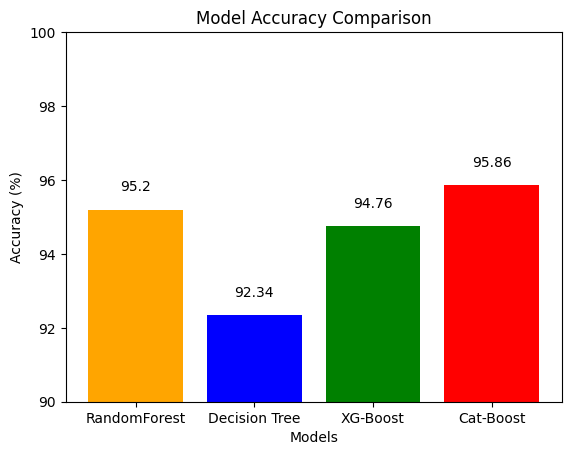

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['RandomForest', 'Decision Tree', 'XG-Boost', 'Cat-Boost']

# Accuracy for each model
accuracy = [95.2, 92.34, 94.76, 95.86]

# Creating the bar plot
plt.bar(models, accuracy, color=['orange', 'blue', 'green', 'red'])

# Adding the title
plt.title('Model Accuracy Comparison')

# Labeling the axes
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# Displaying the values on the bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.5, str(acc), ha = 'center')

# Show the plot
plt.ylim(90, 100)  # Limiting y-axis to make differences more visible
plt.show()
